
## Minimum Norm Solution






## Inputs



(2, 'i_h2i_rate')

(3, 'i_pci_rate')

(5, 'i_ngi_rate')

(6, 'i_o2_volfract')

(8, 'i_h2_temp')

(9, 'i_hbtemp')

(10, 'i_wind_rt')


## Outputs


* desired output requirements 


(27, 'o_tgt')

(29, 'o_hmt')

(39, 'o_prod_rt')

(40, 'o_fta')



In [1]:

## !pip install xgboost
## !pip install onnxmltools
## !pip install onnxruntime
## !pip install pandas
## !pip install scikit-learn
## !pip install matplotlib
## !pip install seaborn
## !pip install mlxtend
## ! pip install skl2onnx



In [2]:


import torch
import numpy as np
import pandas as pd
import sklearn
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
import math
import seaborn as sns
import random
import functorch


import torch.optim as optim


from numpy.random import normal
from scipy.stats import norm
import scipy.stats as stats
from numpy import hstack
from numpy import vstack
from numpy import exp
from sklearn.neighbors import KernelDensity

##from typing import Optional

from torch import Tensor


from torch.utils.data import TensorDataset, DataLoader

from mlxtend.plotting import heatmap

## coefficient of determination (R**2)
from sklearn.metrics import r2_score

np.set_printoptions(suppress=True)
torch.set_printoptions(sci_mode=False)

import os, json, time, uuid


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score





In [4]:


import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor, DMatrix, train as train_xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import onnxmltools
from onnxmltools.convert.xgboost.operator_converters.XGBoost import (
    convert_xgboost)
from onnxmltools.convert import convert_xgboost as convert_xgboost_booster


from zipfile import ZipFile
from skl2onnx.common.data_types import FloatTensorType
from skl2onnx import convert_sklearn, to_onnx, update_registered_converter
from skl2onnx.common.shape_calculator import (
    calculate_linear_classifier_output_shapes,
    calculate_linear_regressor_output_shapes)


# Import the ONNX runtime environment
import onnxruntime as rt




In [5]:

import PDFshapingUtils as PDF_tk


In [6]:

PDFshapingOBJ = PDF_tk.PDFshapingUtils()


In [7]:

PDFshapingOBJ.read_csv_file_with_pandas('CFD.16.2025.csv')


In [8]:

PDFshapingOBJ.CFD_raw_data


,index,case name,i_h2i_rate,i_pci_rate,i_wpi_rate,i_ngi_rate,i_o2_volfract,i_ng_temp,i_h2_temp,i_hbtemp,...,o_h2o_sollos,o_feo_sollos,o_hm_rt,o_mw_rt,o_wf_rt,o_hm_h2share,o_mw_h2share,o_wf_h2share,o_prod_rt,o_fta
0,1,H2-0_PCI-0_WPI-0_NG-120_O2-21_NGT-300_H2T-0_HB...,0,0,0,120,21,300,0,1200,...,20.0,44.9,122.0,264.0,687.0,31.6,26.7,63.5,4050.0,1800.0
1,2,H2-0_PCI-0_WPI-0_NG-100_O2-21_NGT-300_H2T-0_HB...,0,0,0,100,21,300,0,1200,...,18.5,52.6,122.0,265.0,684.0,27.9,23.4,60.6,4060.0,1850.0
2,3,H2-0_PCI-0_WPI-0_NG-100_O2-21_NGT-300_H2T-0_HB...,0,0,0,100,21,300,0,1200,...,19.6,50.9,123.0,266.0,690.0,27.7,23.5,60.8,4080.0,1850.0
3,4,H2-0_PCI-0_WPI-0_NG-100_O2-21_NGT-300_H2T-0_HB...,0,0,0,100,21,300,0,1200,...,19.2,52.2,124.0,268.0,690.0,27.7,23.2,60.6,4090.0,1850.0
4,5,H2-0_PCI-0_WPI-0_NG-100_O2-21_NGT-300_H2T-0_HB...,0,0,0,100,21,300,0,1200,...,19.2,52.4,124.0,268.0,695.0,27.7,23.2,60.7,4110.0,1850.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,4995,H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_...,30,0,0,80,30,300,300,1600,...,18.7,40.3,353.0,763.0,2190.0,34.0,20.5,56.7,11700.0,2380.0
4995,4996,H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_...,30,0,0,80,30,300,300,1480,...,18.7,40.7,353.0,763.0,2190.0,33.8,20.4,56.8,11700.0,2310.0
4996,4997,H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_...,30,0,0,80,30,300,300,1600,...,19.2,37.5,353.0,763.0,2230.0,33.6,20.4,57.1,11700.0,2380.0
4997,4998,H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_...,30,0,0,80,30,300,300,1480,...,17.6,39.8,355.0,768.0,2220.0,34.0,20.0,55.7,11800.0,2310.0


In [9]:

PDFshapingOBJ.print_headers_list()


['index', 'case name', 'i_h2i_rate', 'i_pci_rate', 'i_wpi_rate', 'i_ngi_rate', 'i_o2_volfract', 'i_ng_temp', 'i_h2_temp', 'i_hbtemp', 'i_wind_rt', 'i_blastH2O', 'i_BdnH2O', 'i_sgi_rate', 'i_sgtemp', 'i_sgi_H2COratio', 'i_sgi_ReProRatio', 'o_tuy_velo', 'o_tuy_temp', 'o_burn', 'o_delp', 'o_co_vf', 'o_co2_vf', 'o_h2_vf', 'o_n2_vf', 'o_co_util', 'o_h2_util', 'o_tgt', 'o_coke_rt', 'o_hmt', 'o_co2_sollos', 'o_h2o_sollos', 'o_feo_sollos', 'o_hm_rt', 'o_mw_rt', 'o_wf_rt', 'o_hm_h2share', 'o_mw_h2share', 'o_wf_h2share', 'o_prod_rt', 'o_fta']
41
(0, 'index')
(1, 'case name')
(2, 'i_h2i_rate')
(3, 'i_pci_rate')
(4, 'i_wpi_rate')
(5, 'i_ngi_rate')
(6, 'i_o2_volfract')
(7, 'i_ng_temp')
(8, 'i_h2_temp')
(9, 'i_hbtemp')
(10, 'i_wind_rt')
(11, 'i_blastH2O')
(12, 'i_BdnH2O')
(13, 'i_sgi_rate')
(14, 'i_sgtemp')
(15, 'i_sgi_H2COratio')
(16, 'i_sgi_ReProRatio')
(17, 'o_tuy_velo')
(18, 'o_tuy_temp')
(19, 'o_burn')
(20, 'o_delp')
(21, 'o_co_vf')
(22, 'o_co2_vf')
(23, 'o_h2_vf')
(24, 'o_n2_vf')
(25, 'o_co_ut

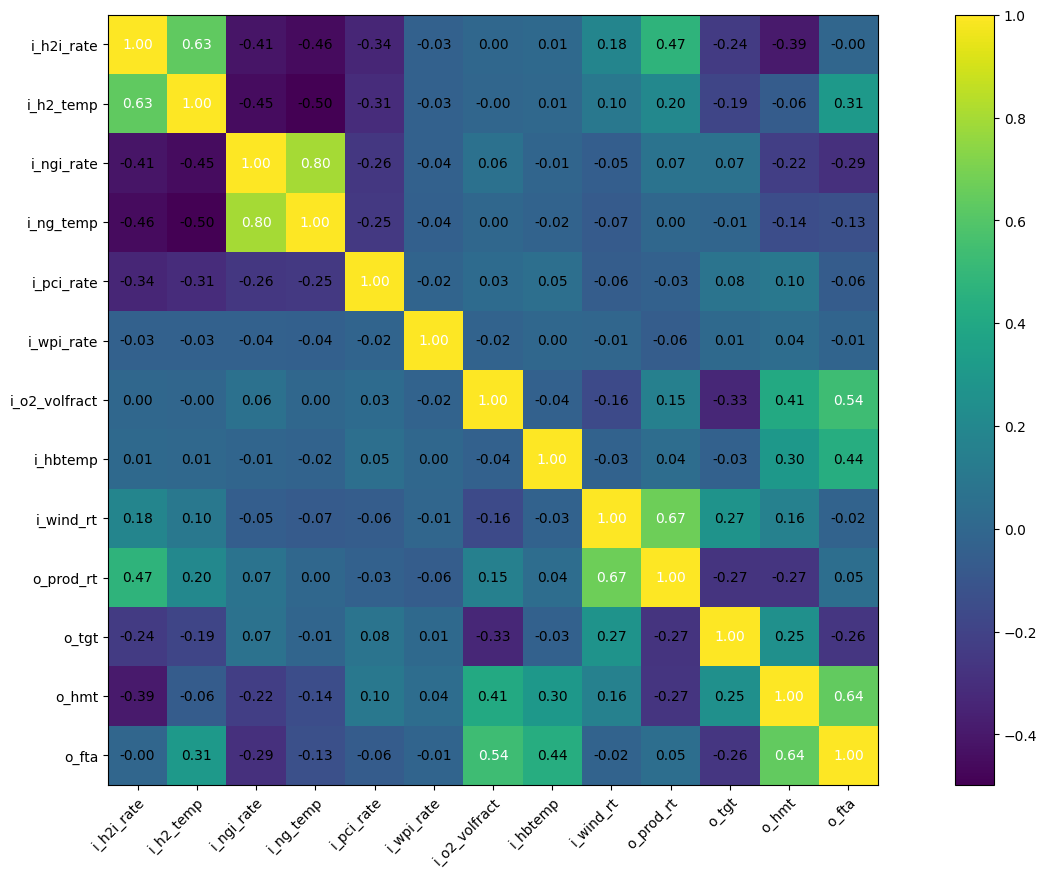

In [10]:


PDFshapingOBJ.list_of_selected_column_names = ['i_h2i_rate','i_h2_temp','i_ngi_rate','i_ng_temp','i_pci_rate',
                    'i_wpi_rate','i_o2_volfract',
                    'i_hbtemp','i_wind_rt','o_prod_rt', 'o_tgt', 'o_hmt','o_fta']



PDFshapingOBJ.print_correlation_coefficients()


In [11]:

PDFshapingOBJ.convert_pd_data_to_numpy()


[[1
  'H2-0_PCI-0_WPI-0_NG-120_O2-21_NGT-300_H2T-0_HBT-1200_WR-195_MHB-5.7_BM-7_SGI-0_SGT-0_SGC_0 '
  0 ... 63.5 4050.0 1800.0]
 [2
  'H2-0_PCI-0_WPI-0_NG-100_O2-21_NGT-300_H2T-0_HBT-1200_WR-195_MHB-5.7_BM-1_SGI-0_SGT-0_SGC_0 '
  0 ... 60.6 4060.0 1850.0]
 [3
  'H2-0_PCI-0_WPI-0_NG-100_O2-21_NGT-300_H2T-0_HBT-1200_WR-195_MHB-5.7_BM-5_SGI-0_SGT-0_SGC_0 '
  0 ... 60.8 4080.0 1850.0]
 ...
 [4997
  'H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_HBT-1600_WR-230_MHB-5.7_BM-5_SGI-0_SGT-0_SGC_0 '
  30 ... 57.1 11700.0 2380.0]
 [4998
  'H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_HBT-1480_WR-230_MHB-5.7_BM-3_SGI-0_SGT-0_SGC_0 '
  30 ... 55.7 11800.0 2310.0]
 [4999
  'H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_HBT-1480_WR-230_MHB-5.7_BM-5_SGI-0_SGT-0_SGC_0 '
  30 ... 56.2 11800.0 2310.0]]
(4999, 41)


In [12]:

PDFshapingOBJ.gen_X_y_for_selected_indeces(  
                   inputs = [  2, 3, 5, 6, 8, 9, 10   ] , 
                   outputs= [ 27, 29, 39, 40 ]   
)


## inputs = [ 2, 3, 5, 6, 8, 9, 10  ]          ## the full 7



7
4


In [13]:

print(PDFshapingOBJ.X.shape)
print(PDFshapingOBJ.y.shape)


(4999, 7)
(4999, 4)


In [14]:

PDFshapingOBJ.random_seed = int( random.random() * 100  )         ## defautl is 42


In [15]:

PDFshapingOBJ.split_np_data_train_test(selected_test_size=0.2)


(3999, 7)
(1000, 7)
(3999, 4)
(1000, 4)


In [16]:

print(PDFshapingOBJ.X_train.shape)
print(PDFshapingOBJ.X_test.shape)

print(PDFshapingOBJ.y_train.shape)
print(PDFshapingOBJ.y_test.shape)


(3999, 7)
(1000, 7)
(3999, 4)
(1000, 4)


In [17]:

from sklearn.decomposition import PCA

# Instantiate PCA to reduce to 4 components
pca = PCA(n_components=4)

# Fit on training data and transform both train and test
X_train_pca = pca.fit_transform(PDFshapingOBJ.X_train)
X_test_pca  = pca.transform(PDFshapingOBJ.X_test)

# Replace the original inputs with PCA-reduced versions
PDFshapingOBJ.X_train = X_train_pca
PDFshapingOBJ.X_test  = X_test_pca





In [18]:

print(PDFshapingOBJ.X_train.shape)
print(PDFshapingOBJ.X_test.shape)

print(PDFshapingOBJ.y_train.shape)
print(PDFshapingOBJ.y_test.shape)


(3999, 4)
(1000, 4)
(3999, 4)
(1000, 4)


In [19]:

PDFshapingOBJ.convert_dataset_from_np_to_torch()


In [20]:

PDFshapingOBJ.standardize_X_scales()
PDFshapingOBJ.standardize_y_scales()


In [21]:


PDFshapingOBJ.gen_Dataloader_train()

PDFshapingOBJ.train_dl



## Model Forward ( 7x4 )


In [22]:


#############################################################
##   F1      plus       F2
## Linear     +      Nonlinear

class F1plusF2_SIO_Forward(nn.Module):
    ## initialize the layers
    def __init__(self, x_means, x_deviations, y_means, y_deviations,  device='cuda'):
        super().__init__()
        self.device = device
        
        ## self.x_means      = x_means
        ## self.x_deviations = x_deviations
        ## self.y_means      = y_means
        ## self.y_deviations = y_deviations
        
        
        self.x_means      = x_means.to(self.device)
        self.x_deviations = x_deviations.to(self.device)
        self.y_means      = y_means.to(self.device)
        self.y_deviations = y_deviations.to(self.device)
        
        
        
        ## F1
        self.f1_linear1 = nn.Linear(7, 4)       
        
        ## F2
        self.f2_linear1 = nn.Linear(7, 10)
        self.f2_act1    = nn.Sigmoid()                    ## Tanh()                       
        self.f2_linear2 = nn.Linear(10, 4)       
        self.f2_dropout = nn.Dropout(0.25)
        
        # Move model to device
        self.to(self.device)
        
        
    ## perform inference
    def forward(self, x):
        x = x.to(self.device)
        x = (x - self.x_means) / self.x_deviations
        
        ## F1
        f1 = self.f1_linear1(x)
        
        ## F2
        f2 = self.f2_linear1(x)
        f2 = self.f2_act1(f2)
        f2 = self.f2_dropout(f2)
        f2 = self.f2_linear2(f2)
        
        
        y_scaled   = f1 + f2
        y_descaled = y_scaled * self.y_deviations + self.y_means
        
        return y_descaled, y_scaled
    




In [23]:

n_inputs  = 4     ## 7
n_outputs = 4





    
class ResidualNet_Forward(nn.Module):
    def __init__(self, x_means, x_deviations, y_means, y_deviations, dropout_rate=0.1, device='cuda'):
        
        super().__init__()
        self.device = device
        
        self.x_means      = x_means.to(self.device)
        self.x_deviations = x_deviations.to(self.device)
        self.y_means      = y_means.to(self.device)
        self.y_deviations = y_deviations.to(self.device)

     
        self.fc1  = nn.Linear(n_inputs, 64)
        self.act1 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout_rate)

        self.fc2 = nn.Linear(64, 64)
        self.act2 = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout_rate)

        self.fc3 = nn.Linear(64, n_outputs)

        # If input_dim ≠ 64, project for residual addition
        self.input_proj = nn.Linear(n_inputs, 64) if n_inputs != 64 else nn.Identity()
        
        # Move model to device
        self.to(self.device)
        

    def forward(self, x):
        x  = x.to(self.device)
        x  = (x - self.x_means) / self.x_deviations
        x0 = self.input_proj(x)
        x1 = self.dropout1(self.act1(self.fc1(x)))
        x2 = self.dropout2(self.act2(self.fc2(x1)))
        x_res = x2 + x0
        y_scaled = self.fc3(x_res)
        y_descaled = y_scaled * self.y_deviations + self.y_means
        
        return y_descaled, y_scaled
    

    


In [24]:

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## model_Forward     = F1plusF2_SIO_Forward(

model_Forward     =     ResidualNet_Forward(
                         PDFshapingOBJ.x_means, 
                         PDFshapingOBJ.x_deviations, 
                         PDFshapingOBJ.y_means, 
                         PDFshapingOBJ.y_deviations,
                         device=device  # pass device into the model
    
)

optimizer = optim.Adam(model_Forward.parameters(), lr=0.001)
loss_fn   = nn.MSELoss()



In [25]:

model_Forward.train()

for epoch in range(1000):
    for xb, yb in PDFshapingOBJ.train_dl:
        
        xb = xb.to(model_Forward.device)
        yb = yb.to(model_Forward.device)
        
        optimizer.zero_grad()
        pred_descaled, pred_scaled = model_Forward(xb)
        loss = loss_fn(pred_scaled, yb)
        loss.backward()
        optimizer.step()
    if epoch % 100 == 0:
        print(epoch, ".....", loss.item() ) 
    



0 ..... 0.5927035212516785
100 ..... 0.5345703363418579
200 ..... 0.3423175513744354
300 ..... 0.2540680468082428
400 ..... 0.22508226335048676
500 ..... 0.31891924142837524
600 ..... 0.5436126589775085
700 ..... 0.332446426153183
800 ..... 0.41338151693344116
900 ..... 0.3020591735839844


In [26]:

print("=== SANITY CHECK: SCALING ===")
print("y_means:", PDFshapingOBJ.y_means)
print("y_deviations:", PDFshapingOBJ.y_deviations)

print("===============================================")

print("x_means:", PDFshapingOBJ.x_means)
print("x_deviations:", PDFshapingOBJ.x_deviations)


=== SANITY CHECK: SCALING ===
y_means: tensor([[  97.5336, 1298.0559, 8431.5332, 2307.7068]])
y_deviations: tensor([[  50.2551,  525.0933, 1515.2939,  211.2103]])
x_means: tensor([[     0.0000,     -0.0000,      0.0000,      0.0000]])
x_deviations: tensor([[363.2631, 157.1200,  51.1241,  31.3130]])


In [27]:

print(PDFshapingOBJ.y_means -  PDFshapingOBJ.y_deviations)
print(PDFshapingOBJ.y_means +  PDFshapingOBJ.y_deviations)


tensor([[  47.2785,  772.9626, 6916.2393, 2096.4966]])
tensor([[ 147.7887, 1823.1492, 9946.8271, 2518.9170]])



## Is model  invertible ?

* use the Jacobian


In [28]:

import torch
from torch.autograd.functional import jacobian


In [29]:

## x = torch.randn(1, 7, requires_grad=True)

x = torch.randn(      7, requires_grad=True)  # shape [7]

x = torch.randn(      4, requires_grad=True)  # shape [7]


In [30]:

def wrapped_model(x):
    y_descaled, _ = model_Forward(x)
    return y_descaled  # Only return 1 tensor to get a clean Jacobian




In [31]:

## J = jacobian(model_Forward, x)

J = jacobian(wrapped_model, x)


In [32]:

print( len(J) )


1


In [33]:


print( J.shape )  # Should be [1, 4, 7]


torch.Size([1, 4, 4])


In [34]:

u, s, v = torch.svd(J)  


In [35]:

rank = (s > 1e-5).sum()


In [36]:


print("Local Jacobian rank:", rank.item())


Local Jacobian rank: 4



## Example of Min Norm Solution


In [39]:

import torch
from torch.autograd.functional import jacobian

def solve_minimum_norm_update(x0, target_y):
    """
    Computes a minimum-norm update step for the input x0 towards the target_y.
    
    Args:
        model (nn.Module): The neural network.
        x0 (torch.Tensor): Initial guess for the input.
        target_y (torch.Tensor): The desired output.

    Returns:
        torch.Tensor: The minimum-norm update to x0 (Delta x).
    """
    # Ensure the input requires gradients
    
    x = x0.detach().clone().requires_grad_(True)
    
    # Define a function to compute the output for use with jacobian()
    ## def func(input_x):
    ##    return model(input_x)

    # Compute the Jacobian matrix at the current input x
    # 'create_graph=True' is often needed if you want to backpropagate through this process
    J = jacobian(wrapped_model, x, create_graph=True, vectorize=True)
    
    # Calculate the current residual (difference between desired and actual output)
    current_y = wrapped_model(x)
    delta_y = target_y - current_y
    
    # Flatten the Jacobian and residual if necessary (depends on problem dimensions)
    # This example assumes J is 2D and delta_y is 1D for simplicity
    if J.dim() > 2:
        J = J.view(-1, x.numel())
        delta_y = delta_y.view(-1)
        
    # Compute the pseudoinverse of the Jacobian using SVD
    J_pinv = torch.pinverse(J)
    
    # Calculate the minimum norm update: Delta x = J_pinv @ Delta y
    delta_x = J_pinv @ delta_y
    
    # Reshape delta_x to match the original input shape
    delta_x = delta_x.view_as(x0)
    
    return delta_x


###################################################################
# Example usage with a simple model (ensure model is defined)
## model = model_Forward()

input_dim  = 4
output_dim = 4

x0       = torch.randn(1, input_dim)

target_y = torch.randn(1, output_dim)
delta_x = solve_minimum_norm_update( x0, target_y)

x_new = x0 + delta_x

print( x_new )



tensor([[5272.9712, 3930.3894,  423.8080, -421.4101]], grad_fn=<AddBackward0>)



## Approach


In [51]:


def solve_minimum_norm_update( x0, target_y):
   
    
    # Ensure the input requires gradients

    x = x0.detach().clone().requires_grad_(True)
    

    # Compute the Jacobian matrix at the current input x
    # 'create_graph=True' is often needed if you want to backpropagate through this process
    
    J = jacobian(wrapped_model, x, create_graph=True, vectorize=True)
    
    # Calculate the current residual (difference between desired and actual output)
    current_y = wrapped_model(x)
    delta_y   = target_y - current_y
    
    print( J.shape )
    
    # Flatten the Jacobian and residual if necessary (depends on problem dimensions)
    # This example assumes J is 2D and delta_y is 1D for simplicity
    if J.dim() > 2:
        J = J.view(-1, x.numel())
        delta_y = delta_y.view(-1)
        
    # Compute the pseudoinverse of the Jacobian using SVD
    ####################################
    #J_pinv = torch.pinverse(J)
    
    U, S, Vt = torch.linalg.svd(J)
    S_inv = torch.where(S > 1e-2, 1.0/S, torch.zeros_like(S))
    J_pinv = Vt.T @ torch.diag(S_inv) @ U.T

    
    ####################################
    
    # Calculate the minimum norm update: Delta x = J_pinv @ Delta y
    ## delta_x = J_pinv @ delta_y
    delta_x = 0.01 * (J_pinv @ delta_y)

    
    # Reshape delta_x to match the original input shape
    delta_x = delta_x.view_as(x0)
    
    return delta_x







In [52]:



x_starting_point = torch.tensor(   PDFshapingOBJ.X_test[0]   )    ## starting point


for i in range(  1, PDFshapingOBJ.X_test.shape[0]  ):
    
    target_y  = torch.tensor( PDFshapingOBJ.y_test[i]   )    ## what you want y ?
    x_real    = torch.tensor( PDFshapingOBJ.X_test[i]   )    ## real x
    
    x_temp    = x_starting_point
    
    for j in range(10):
        
        delta_x  = solve_minimum_norm_update( x_temp, target_y )
        x_temp   = x_temp + delta_x
        
        
    x_new             = x_temp  
    
    x_new_np          =  x_new.detach().numpy()
    x_real_np         = x_real.detach().numpy()
    
    x_new_solution    = pca.inverse_transform( x_new_np   )
    x_real_np_sol     = pca.inverse_transform( x_real_np  ) 
    
    
    
    print( x_new_solution )
    print( x_real_np_sol )
    
    print(i)
    print('********************************')



torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  14.13866739   -2.34483515   45.92391046   25.47923513  254.94613753
 1428.4791839   199.80558089]
[   4.59483588   93.53676202    3.18016257   25.48774417   -0.07452498
 1600.03142903  194.47726001]
1
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  15.94432838   -3.09645631   37.86440497   25.4005598   296.54556049
 1463.19451321  200.44025527]
[   2.02875415  121.93356166   -2.65062879   25.65005157   -0.03356169
 1599.94993467  192.45134593]
2
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4]

torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  10.39643004   -2.50047755   76.02497062   25.77107259  248.14920301
 1408.41764126  197.56017219]
[   0.7209513     2.98454059  122.62239624   25.91506473   -0.01278807
 1600.04026907  193.28417952]
26
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  15.59831301   -2.90990861   39.8280141    25.41820907  291.27384803
 1461.09821266  200.27740229]
[   5.58880231   -2.18583394   78.1943984    25.77963641   -0.08872848
 1199.94509139  197.62241958]
27
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  15.3711932    -

torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  17.96057555   -3.43828627   34.2033996    25.40499538  387.66954176
 1494.56920817  200.71283371]
[  26.21005528   -3.87423031   -3.64249186   25.11781042  600.22361024
 1600.00001568  203.49968905]
57
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  14.72170063   -3.02672778   48.91800279   25.48083497  298.18221025
 1494.4037295   199.5550768 ]
[   4.38536112   77.41963045   17.81919481   25.59790292   -0.07136669
 1479.94697663  194.92250928]
58
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  14.92504482   -

torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  15.52956301   -3.01398964   44.52221726   25.50396678  324.96490107
 1438.58312838  199.96134717]
[  -1.67417074  149.34101748   -0.62094785   25.97437286    0.02346501
 1480.00195413  190.06978319]
88
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  19.87296597   -3.45554284   14.37519677   25.24733287  367.55939404
 1441.03839012  202.28709585]
[   4.19668001   37.43560455   57.82932633   25.66734056   -0.06842146
 1479.94808833  195.36184864]
89
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 

torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  14.35676621   -3.05018639   50.62470031   25.49314685  288.65811368
 1490.09206379  199.43258055]
[  12.95652406   -3.5705122    66.75123536   25.56062346  300.11567946
 1599.97591623  198.11262874]
119
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  13.49105216   -2.58559347   54.56613854   25.61973187  285.2852694
 1379.41369012  199.2358865 ]
[   6.73505558    0.96348116   70.95844902   25.53737211   -0.11122961
 1447.98949328  197.57726569]
120
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4,

torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  15.20829706   -3.1920024    42.38230322   25.36548705  271.75415686
 1536.38792059  200.00958738]
[  21.26605401   -3.27884839   -3.01678911   24.90941982  300.14506293
 1599.98417374  203.38214382]
150
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  16.54046041   -3.55588829   36.71797433   25.38663884  318.72795135
 1482.9987732   200.54296159]
[  20.7924295    -5.60133552   -5.45516029   25.18917742  300.4679707
 1200.04346894  204.28593868]
151
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4,

torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  15.63401426   -2.95705601   42.66875566   25.44938949  312.29408109
 1474.08415032  200.0504118 ]
[  34.38444123    2.29697272    2.27753978   25.65757103 1199.76817773
 1599.97377183  202.55058146]
181
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  15.8399007    -2.77334067   40.15238234   25.46564621  315.05073644
 1428.58893584  200.28437548]
[   2.72066105    3.33271228  102.95695117   25.82955501   -0.04699358
 1480.03951141  194.90144503]
182
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  16.77408559  

torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  18.9889861    -3.60423999   21.49947441   25.30485034  363.45611946
 1447.38677414  201.75088769]
[  20.64243454   -0.41493434   -0.55292153   24.9543218   300.14633675
 1600.03770155  202.94612509]
211
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  14.96621463   -2.60763865   40.37059642   25.38639128  255.3537759
 1477.36053382  200.18673953]
[   4.21701855   90.53368488    0.55038094   25.76036441   -0.06657735
 1199.98865279  195.45485792]
212
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4,

torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  14.40727599   -2.73244794   55.34028988   25.58423329  331.96077588
 1473.95033097  199.07058443]
[  24.77466685    2.34132388    2.32494372   25.22084578  599.76228595
 1599.97236319  202.50649368]
238
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  13.58311646   -2.87666285   55.77199773   25.54216367  281.03922015
 1483.7974133   199.03452334]
[  25.37665498   -1.71294141   -1.39540825   25.25121397  599.91469652
 1479.95254652  203.29638447]
239
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4

torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  16.39634761   -3.36407781   39.93148802   25.44648483  337.99946174
 1465.21727969  200.30656052]
[  21.17024771   -2.59826073   -2.82538023   24.91655716  300.46004963
 1600.08624548  203.30834109]
265
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  16.96157262   -3.22908362   47.88926586   25.62239289  439.16280395
 1432.00781142  199.73998112]
[  -3.74702226    2.3229178   151.95723977   26.50494686    0.05837457
 1200.05019851  191.63229117]
266
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4

torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  17.07644713   -2.94451871   24.75922292   25.25360327  269.33013975
 1470.10281792  201.41104485]
[   9.70674607   -1.04044592   88.90208356   25.88344544  300.16686215
 1480.02597032  196.36661341]
293
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  15.10391828   -2.89207505   49.70542062   25.52924411  332.03049651
 1475.25619871  199.51042257]
[  25.03570882    1.2606116     1.20226939   25.20217582  599.92026711
 1599.99543137  202.68562262]
294
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4

torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  15.05533175   -2.91450399   46.63116974   25.46915267  303.72945467
 1488.36347038  199.72701923]
[  20.36993498    0.7095812     0.62397246   24.97384119  299.99289615
 1600.00984916  202.75907992]
324
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  17.58519538   -3.32823295   28.61774839   25.32712286  326.87899445
 1472.16761501  201.15241324]
[  19.08454232    1.73873139    1.68916609   25.31173212  299.85321314
 1199.98796418  203.10569863]
325
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4

torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  15.31725282   -3.32345194   46.3373021    25.43850655  309.14884371
 1524.25136816  199.73882596]
[   8.93481489   -3.07810193   97.29507995   25.94644287  300.01989108
 1479.95786199  195.90685954]
355
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  12.78780695   -2.66182829   57.89179485   25.52017018  245.19896906
 1505.48041866  198.82476233]
[   5.44618388   -2.26462519   88.13968173   25.55205146   -0.08183662
 1599.93883476  196.35760038]
356
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  17.18310047  

torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  14.77442809   -3.32005474   50.04618076   25.52375911  312.67112172
 1464.3764191   199.53464309]
[  21.8167808    -5.54977749   -5.39768242   24.86995639  300.44966074
 1600.0422857   203.76019159]
386
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  15.49448529   -2.88024841   44.94961563   25.44042834  314.57428713
 1514.78220262  199.81818129]
[   9.19899771   21.39727919   31.40140883   25.29727507   -0.14614946
 1479.97964092  198.7616999 ]
387
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  15.41051181  

torch.Size([1, 4, 4])
[  21.84198133   -3.94669982    3.12877878   25.17982676  405.8197177
 1423.94675656  203.20773531]
[  -8.41127233   81.38402072  121.05569352   26.59514865    0.13542129
 1480.05365006  186.74287075]
417
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  14.58654356   -3.21354946   51.39060386   25.49838287  305.0159558
 1505.85736287  199.36928126]
[  -3.11194664   -0.58479641  149.43915903   26.45919553    0.05254161
 1200.00145468  192.07622537]
418
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  13.46524096   -2.75520563   58.42629925   25.59457407  297.

[  17.26112772   -2.84665614   36.44969834   25.43181578  368.13099785
 1475.18866416  200.5147774 ]
[  24.38917656    4.21212637    3.77456911   25.24877656  599.93067488
 1600.03939136  202.23377247]
448
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  23.45537405   -2.50902009  -12.87699403   25.01430547  393.75971925
 1446.18098123  204.26800901]
[   0.42682183    2.91870327  122.54279805   26.00985421   -0.01252575
 1480.04613182  193.45100714]
449
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  15.17633092   -2.97573558   49.49995752   25.58813312  344.95836291
 1410.25289

torch.Size([1, 4, 4])
[  14.72754888   -3.17694257   46.39099957   25.43600108  277.57029146
 1500.63773501  199.75060137]
[  24.92466191   -2.84507745   -2.57729526   25.4557014   600.0839237
 1199.97813062  203.84630731]
478
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  14.85528065   -2.77505603   49.97679354   25.51738375  318.28923878
 1481.84799377  199.47029755]
[  20.10316452    1.81219278    1.77375522   24.99293584  299.83717951
 1599.9843736   202.57599319]
479
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  14.30166188   -3.06856762   39.37448422   25.36162029  207

torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  15.08708891   -2.91850681   47.19407343   25.4233239   300.08634801
 1548.85425385  199.60625478]
[  35.01378939   -0.58884075   -0.21343685   25.61224436 1199.76464701
 1599.92265147  202.99055804]
509
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  13.03086371   -2.83737763   61.5769914    25.61848447  292.83380829
 1467.49068766  198.61234477]
[  20.70515286   -2.24207249   -1.9465972    25.02330401  299.98959755
 1479.96457226  203.365884  ]
510
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  13.68707122   -2.41508714   55.8196

torch.Size([1, 4, 4])
[  13.49627138   -2.67083493   50.97866649   25.4409014   236.15566376
 1515.2982095   199.33696141]
[  10.06150297   -1.3774202    40.00334781   25.4280742    -0.15581511
 1199.93205939  200.45057582]
540
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  15.51847877   -2.83352017   37.81256328   25.38402124  271.47328383
 1462.91786881  200.42015919]
[  24.29531375    0.0407365    -0.08631882   25.50102806  600.08745428
 1200.02926623  203.40633068]
541
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[   6.66582847   -2.53830944   95.03969571   25.68538477  12

torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  15.46806062   -3.36868331   48.94101063   25.50281317  341.14218679
 1503.08942534  199.57445588]
[  34.79547941   -3.970143     -3.74737667   25.87375664 1200.24782679
 1200.00262303  204.06952442]
571
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  12.98138179   -2.8806458    62.98270283   25.62718452  298.29276934
 1477.63119325  198.49665212]
[  -1.97437784   89.43068147   59.47557369   26.07980339    0.03469898
 1479.99644926  190.71691844]
572
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4

torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  19.37348247   -3.85635085   19.15995422   25.26486644  364.73297953
 1468.72500087  201.92285949]
[  34.54016489   -2.91132923   -2.65180825   25.89200194 1200.08754323
 1199.98194659  203.89435303]
601
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  14.58179319   -3.32540871   49.37115387   25.50266217  295.14970479
 1466.82234868  199.58210744]
[  10.668413     -4.0064221    86.30997565   25.74049798  300.14786775
 1599.98492102  196.66614867]
602
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4

torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  13.45435294   -2.74923687   51.45382579   25.39054025  226.90821131
 1574.60943906  199.23050571]
[  11.08012496   -1.30395904   40.08793664   25.10927789   -0.17186804
 1599.92848389  199.9208704 ]
632
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  15.10775022   -2.99586983   44.30024475   25.46459336  294.05303399
 1457.19075322  199.95068474]
[  24.39111995   -0.63985019   -0.27772677   25.49389074  599.77247533
 1199.92719455  203.48013326]
633
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4

torch.Size([1, 4, 4])
[  15.40349778   -2.97438174   53.14889276   25.61320815  379.49439028
 1453.10147087  199.28777116]
[  34.65694039    1.1724589     1.10064736   25.63805166 1199.92161452
 1600.00163941  202.73762634]
663
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  14.52398882   -2.94799481   48.72830277   25.51838068  293.50568664
 1441.76277441  199.63036954]
[  18.69905127    3.60953592    3.13879521   25.33966294  300.02159665
 1200.05499226  202.83297696]
664
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  16.33967915   -2.98295537   35.73378134   25.37433629  30

torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  15.38720192   -2.8451659    40.83169629   25.42930529  286.92985541
 1455.63942828  200.20239104]
[   6.41651739   70.955678      0.96960138   25.61478403   -0.09957267
 1199.98259592  197.12496562]
695
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  14.62525428   -2.79034934   42.53310794   25.40768362  250.15309381
 1469.58194904  200.0482383 ]
[  -2.02657439  152.35837416    2.0309486    25.92618414    0.03358002
 1600.04004717  189.45110514]
696
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4

torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  16.69074368   -3.05566797   28.45739152   25.24771997  264.71024154
 1515.46145769  201.08114617]
[   6.29610967   -2.11250952   78.28071705   25.55690369   -0.09767208
 1479.94019131  197.24766794]
726
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  17.55547258   -3.08600698   34.54696088   25.45317821  377.51027195
 1432.49261409  200.73573496]
[   8.7970789     4.41610682   45.01240833   25.51915221   -0.14645126
 1200.03192359  199.56666487]
727
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4

torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  11.85556439   -2.16571955   73.35717022   25.70019328  303.78856256
 1519.64326896  197.59320311]
[   9.80997282    4.51146935   45.12410549   25.20078062   -0.16020151
 1600.02595629  199.03300147]
757
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  15.3803362    -3.19821164   52.69970952   25.64106764  379.86769926
 1411.24066241  199.39543619]
[  20.78889965   -2.64807734   -2.88463227   25.03727505  300.46386222
 1448.08999528  203.51358712]
758
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4

torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  14.51837059   -3.20616301   30.06269476   25.17676457  140.93517583
 1508.69930193  200.97357876]
[   1.06189775    0.0109878   120.02471594   25.96410286   -0.01835885
 1479.99738802  193.89494156]
788
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  16.11567803   -3.07572138   36.98551695   25.39342636  300.44972477
 1465.57713458  200.50231332]
[  -1.67989932  149.36291665   -0.5938372    25.97479756    0.02573715
 1479.99956209  190.06582523]
789
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4

torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  15.90129688   -2.16769483   51.38508324   25.65195651  408.83609136
 1418.47483344  199.39804412]
[  33.69336484    4.14573641    3.70178789   25.7811407  1199.9414038
 1480.04188278  202.43677195]
819
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  10.41252765   -2.24331752   85.38923288   25.86476156  312.32926671
 1461.86723353  196.761987  ]
[  10.06942937    1.5320381    42.51966046   25.27532246   -0.16449042
 1447.98336153  199.68613989]
820
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4,

torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  18.29444095   -2.80177727   31.02690797   25.43433944  398.72244402
 1436.87525256  200.97380461]
[   0.42682183    2.91870327  122.54279805   26.00985421   -0.01252575
 1480.04613182  193.45100714]
850
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  16.35202906   -3.30585956   38.71627064   25.45523115  331.51012915
 1434.71150126  200.43275075]
[  -2.46321575   -0.60494982  149.41027633   26.26026774    0.03576096
 1448.00641167  191.75968175]
851
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4

torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  14.59908114   -3.18107332   52.39728579   25.5320629   316.69444946
 1486.50606658  199.31577834]
[  11.09158213   -1.34776121   40.0337186    25.1084285    -0.17641212
 1599.93325279  199.92878644]
876
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  12.16784153   -2.65387597   66.15796183   25.67481653  278.9355146
 1439.80289941  198.28366225]
[   3.7867574     0.59152789   90.60028628   25.9170238    -0.05767858
 1199.98877729  196.43941339]
877
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4,

torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  15.41974234   -2.76391179   41.94574631   25.39944514  289.24477213
 1508.86941858  200.04213388]
[   5.95516327    0.86104569   80.87839444   25.50786556   -0.09210134
 1599.98306849  196.63690592]
904
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  14.68068495   -3.24207159   48.09217366   25.45605683  286.50442039
 1503.00500971  199.62464286]
[  12.07351096   -4.86918001   75.40793012   25.63189074  300.28976989
 1600.00349459  197.56851776]
905
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4

torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  16.91498391   -3.19568489   36.36391577   25.44323669  349.16343702
 1439.30441777  200.59684232]
[  13.73800267   -1.56935914   58.31305869   25.4969182   300.25885169
 1600.04800237  198.5789793 ]
934
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  18.37260835   -3.12293815   29.01999703   25.40643121  386.72412995
 1434.26449057  201.15667404]
[  20.23817286   -0.37714808   -0.50373898   25.07673848  300.15926434
 1448.03189143  203.13553932]
935
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4

torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  13.91960089   -2.98539215   54.33385221   25.55060326  293.33201464
 1466.58519156  199.17611307]
[  14.30970066   -0.27082808   49.65809535   25.52171451  300.09185153
 1480.01910307  199.27804393]
961
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  13.47833695   -2.65636717   49.44315695   25.42168731  224.397163
 1510.76146742  199.45738223]
[  25.10415583   -0.58842736   -0.21851585   25.27073333  599.76125963
 1479.92469037  203.10933956]
962
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 

torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  13.63516461   -2.94541813   55.43560726   25.47588206  270.20335002
 1552.1483333   198.9770411 ]
[  14.94477668   -3.17854222   47.14001172   25.47596315  300.08602218
 1479.97036309  199.72197833]
988
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
[  13.51096722   -2.94090607   58.26423911   25.58774895  296.9504705
 1469.8891991   198.86990983]
[  34.26766573   -1.78681541   -1.47491584   25.91152131 1199.93410644
 1199.95407901  203.70730815]
989
********************************
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4, 4])
torch.Size([1, 4,